<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/Overfit_Underfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**How to prevent Overfitting and Underfitting**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/fruit_dataset.csv')

In [3]:
df.head(50)

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
5,2,mandarin,80,5.8,4.3,0.77
6,2,mandarin,80,5.9,4.3,0.81
7,2,mandarin,76,5.8,4.0,0.81
8,1,apple,178,7.1,7.8,0.92
9,1,apple,172,7.4,7.0,0.89


In [4]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

In [5]:
df['fruit_label'].value_counts()

1    19
3    19
4    16
2     5
5     2
Name: fruit_label, dtype: int64

In [6]:
x = df.iloc[:,2:5]
y= df.iloc[:,0]

In [7]:
print(x)
print(y)

    mass  width  height
0    192    8.4    7.30
1    180    8.0    6.80
2    176    7.4    7.20
3     86    6.2    4.70
4     84    6.0    4.60
..   ...    ...     ...
56   116    5.9    8.10
57   152    6.5    8.50
58   118    6.1    8.10
59   201    7.7   10.10
60   209    8.1   12.11

[61 rows x 3 columns]
0     1
1     1
2     1
3     2
4     2
     ..
56    4
57    4
58    4
59    5
60    5
Name: fruit_label, Length: 61, dtype: int64


##Preventing Overfitting:

**1. Using Cross validation:**

Cross validation is a very powerful preventive measure against overfitting, with a clever idea. Create multiple mini train-validation splits within the original train data, and use these to tune your model.

We have a standard way of doing so, called the “k-fold cross validation”. What we do here is, partition the dataset into k subsets which we call “folds”.

Then we iteratively train our model on k – 1 folds. Why? We keep the last one as a validation dataset. The last fold is called the “holdout fold”.

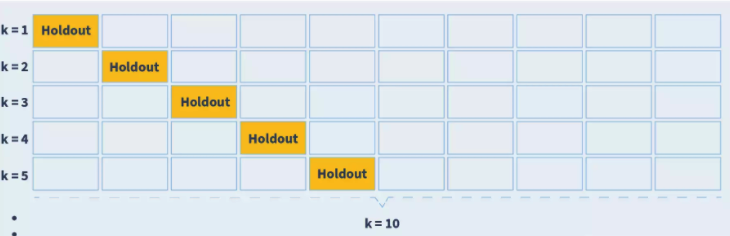



Using cross validation, you can tune your hyperparameters only with your original training dataset. This way, you can keep the validation set as a completely unseen dataset.

K-fold cross validation might not completely remove the overfitting, so we can change the folds every now and then, or use multiple k-fold cross validations together.

**2. Train with more data:**

The signal will be better detected by the algorithm if we train the model with more data. Although it doesn’t work every time, for example if we just add more noisy data, then this technique won’t help.

**3. Remove Features**

In algorithms that don’t have a built-in feature selection, their generalization can be manually improved by removing some irrelevant or unimportant features. Why is removing features helpful? Sometimes it may happen that the model may fail to generalize simply because the model missed the patterns that should have been detected, and the data was too complex for the same.

**4. Add Regularization:**

As we discussed earlier, that overfitting could be a consequence of the model being too complex. Can we forcefully make it simpler? Yes! Regularization is the term for a range of techniques that could be used to force your model into being simpler. The techniques used to regularize any model will depend on the model itself. For example, an option could be pruning a decision tree, on neural networks you could use a dropout, or, to the cost function in regression, a penalty parameter could be added. Confusing terms eh? Google them!



<br>


Identify Overfitting in Our Dataset

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = .20, random_state=1)



In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
from sklearn import metrics


print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))

training score:  0.7291666666666666
test score:  0.46153846153846156


In [11]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

###**Solving Overfitting in Our Dataset** : Train with more data

##Resampling Techniques

We can change the dataset that we are using to build our predictive model to have more balanced data.

This approach is normally referred to as sampling the dataset. There are two main methods that are typically used.


1. **Upsampling/OverSampling**
2. **DownSampling/UnderSampling**

Since our dataset is small and we want to increase it we will use *Upsampling/OverSampling* techique:

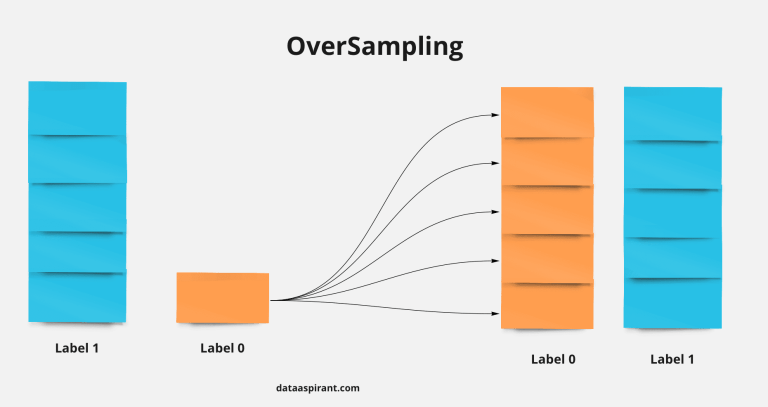

####Upsample Mandarin

In [12]:

# separate minority and majority classes
from sklearn.utils import resample

mandarin = df[df.fruit_label==2]
apple = df[df.fruit_label==1]

# upsample minority
mandarin_data_upsampled = resample(mandarin,
                          replace=True, # sample with replacement
                          n_samples= len(apple)-5,    #len(apple), # match number in majority class
                          random_state=67) # reproducible results

In [13]:
mandarin_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
6,2,mandarin,80,5.9,4.3,0.81
5,2,mandarin,80,5.8,4.3,0.77
4,2,mandarin,84,6.0,4.6,0.79
4,2,mandarin,84,6.0,4.6,0.79
6,2,mandarin,80,5.9,4.3,0.81
6,2,mandarin,80,5.9,4.3,0.81
4,2,mandarin,84,6.0,4.6,0.79
6,2,mandarin,80,5.9,4.3,0.81
3,2,mandarin,86,6.2,4.7,0.80
6,2,mandarin,80,5.9,4.3,0.81


In [14]:
mandarin_data_upsampled = mandarin_data_upsampled.reset_index(drop=True)

In [15]:
mandarin_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
0,2,mandarin,80,5.9,4.3,0.81
1,2,mandarin,80,5.8,4.3,0.77
2,2,mandarin,84,6.0,4.6,0.79
3,2,mandarin,84,6.0,4.6,0.79
4,2,mandarin,80,5.9,4.3,0.81
5,2,mandarin,80,5.9,4.3,0.81
6,2,mandarin,84,6.0,4.6,0.79
7,2,mandarin,80,5.9,4.3,0.81
8,2,mandarin,86,6.2,4.7,0.80
9,2,mandarin,80,5.9,4.3,0.81


In [16]:
Frame =[df,mandarin_data_upsampled]

df = pd.concat(Frame,axis = 0)

df

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
...,...,...,...,...,...,...
9,2,mandarin,80,5.9,4.3,0.81
10,2,mandarin,76,5.8,4.0,0.81
11,2,mandarin,84,6.0,4.6,0.79
12,2,mandarin,80,5.8,4.3,0.77


In [17]:
df.tail(50)

,fruit_label,fruit_name,mass,width,height,color_score
25,3,orange,356,9.2,9.20,0.75
26,3,orange,362,9.6,9.20,0.74
27,3,orange,204,7.5,9.20,0.77
28,3,orange,140,6.7,7.10,0.72
29,3,orange,160,7.0,7.40,0.81
30,3,orange,158,7.1,7.50,0.79
31,3,orange,210,7.8,8.00,0.82
32,3,orange,164,7.2,7.00,0.80
33,3,orange,190,7.5,8.10,0.74
34,3,orange,142,7.6,7.80,0.75


In [18]:
df['fruit_name'].value_counts()

apple       19
mandarin    19
orange      19
lemon       16
mango        2
Name: fruit_name, dtype: int64

In [19]:

# separate minority and majority classes
from sklearn.utils import resample

mango = df[df.fruit_label==5]
apple = df[df.fruit_label==1]

# upsample minority
mango_data_upsampled = resample(mango,
                          replace=True, # sample with replacement
                          n_samples= len(apple)-2,    #len(apple), # match number in majority class
                          random_state=67) # reproducible results

In [20]:
mango_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
59,5,mango,201,7.7,10.10,0.71


In [21]:
mango_data_upsampled = mango_data_upsampled.reset_index(drop=True)

In [22]:
mango_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
0,5,mango,209,8.1,12.11,0.78
1,5,mango,209,8.1,12.11,0.78
2,5,mango,201,7.7,10.10,0.71
3,5,mango,209,8.1,12.11,0.78
4,5,mango,209,8.1,12.11,0.78
5,5,mango,209,8.1,12.11,0.78
6,5,mango,209,8.1,12.11,0.78
7,5,mango,209,8.1,12.11,0.78
8,5,mango,209,8.1,12.11,0.78
9,5,mango,201,7.7,10.10,0.71


In [23]:
Frame =[df,mango_data_upsampled]

df = pd.concat(Frame,axis = 0)

df

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.30,0.55
1,1,apple,180,8.0,6.80,0.59
2,1,apple,176,7.4,7.20,0.60
3,2,mandarin,86,6.2,4.70,0.80
4,2,mandarin,84,6.0,4.60,0.79
...,...,...,...,...,...,...
12,5,mango,209,8.1,12.11,0.78
13,5,mango,209,8.1,12.11,0.78
14,5,mango,201,7.7,10.10,0.71
15,5,mango,209,8.1,12.11,0.78


In [24]:
df['fruit_name'].value_counts()

apple       19
mandarin    19
orange      19
mango       19
lemon       16
Name: fruit_name, dtype: int64

In [25]:
x = df.iloc[:,2:5]
y= df.iloc[:,0]

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = .20, random_state=1)

### Preprocessing

In [27]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_train)
scaler

StandardScaler()

In [28]:
x_train = scaler.transform(x_train)
x_train

array([[ 0.68715133,  0.61209708,  0.87900781],
       [ 0.24177965,  0.1793311 ,  0.87900781],
       [ 0.04383668,  0.2875226 , -0.26557303],
       [ 0.81911331,  1.04486305,  1.67232073],
       [ 0.01084619, -0.03705188, -0.10769981],
       [ 0.50570361,  0.39571409,  0.08964171],
       [ 0.07682718,  0.07113961, -0.34450964],
       [ 0.93458004,  0.1793311 ,  0.91847611],
       [-1.24279261, -1.2271583 , -1.29174896],
       [-1.3087736 , -1.33534979, -1.41015387],
       [-0.6819542 , -1.33534979,  0.05017341],
       [-0.15410628, -0.03705188,  0.0107051 ],
       [ 0.34075114,  0.50390558,  0.12911002],
       [-1.3087736 , -1.33534979, -1.41015387],
       [ 0.17579866,  0.50390558,  0.0107051 ],
       [-0.28606826,  0.50390558, -0.0287632 ],
       [ 0.81911331,  1.04486305,  1.67232073],
       [ 0.43972262,  0.07113961,  0.52379306],
       [ 0.81911331,  1.04486305,  1.67232073],
       [-0.0551348 ,  0.61209708, -0.30504134],
       [ 0.81911331,  1.04486305,  1.672

In [29]:
x_test = scaler.transform(x_test)

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
from sklearn import metrics


print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))

training score:  0.8356164383561644
test score:  0.7894736842105263


Now we can see from the output that the overfitting problem is solved.

Check how to reduce Overfitting with [Regularization and Feature Selection](https://colab.research.google.com/drive/1dfNPxPbom8XY_b1reGc1MMMf8Znn3DW5?usp=sharing)

<br>

<br>




#**Preventing Underfitting:**

**1. Increasing the Complexity of the model:**

A probable cause of underfitting could be the fact that the model is not complex enough to understand the underlying patterns in data. Making the switch to say, a non-linear model from a linear model or, say, by adding more hidden layers to your existing neural network could be ways to make the model more complex, and in turn could help in removal of underfitting.

**2. Reducing Regularization:**

Well, underfitting is somewhat close to the opposite of overfitting. So, as we read earlier, regularization could help solve the overfitting problem, then reducing it could solve the underfitting problem! Some of the algorithms you use by default include some regularization parameters meant to suppress overfitting. Sometimes, these could also cause hindrance in the learning of the algorithm. Decreasing their values for the most part, makes a difference. You must be thinking, that if underfitting is almost the opposite of overfitting, then maybe adding more features or data would help solve the problem? NO! If the dataset lacks features that are decisive, and important that could help your model in detecting patterns, you can multiply the training data set by 2 or 5, or even 10, but it will not help in making your algorithm better. It is a common notion to think that throwing more data would solve the problem, but as stated earlier, it might just jeopardize the project.

In [32]:
weather_data_p = pd.read_csv('/content/WeatherDataP.csv')
weather_data_p

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83
5,1014.52,0.85
6,1014.16,0.83
7,1014.24,0.78
8,1014.25,0.72
9,1013.96,0.61


In [33]:
x = weather_data_p[['Pressure (millibars)']]
y = weather_data_p.Humidity

In [34]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train,y_test =train_test_split(x,y, test_size=.20, random_state=1)



In [35]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [36]:
from sklearn import metrics

print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))

training score:  0.29065760334760526
test score:  0.14324706577023627


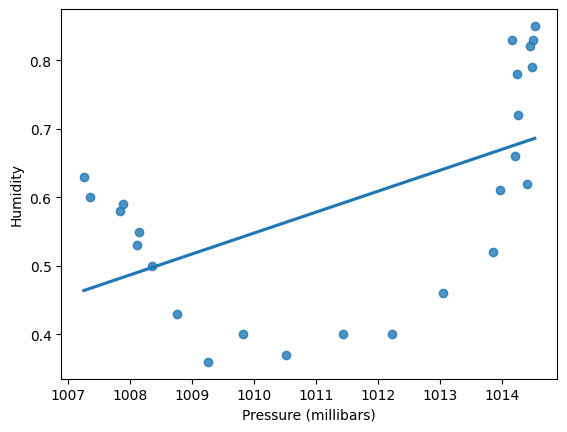

In [37]:
import seaborn as sns

sns.regplot(x = x,y = y, data = weather_data_p, ci = None)
plt.show()

  our dataset is not linear so linear regression is not fitting well.

#Increase the model Complexity

We will move from just linear features to Polynomial features.

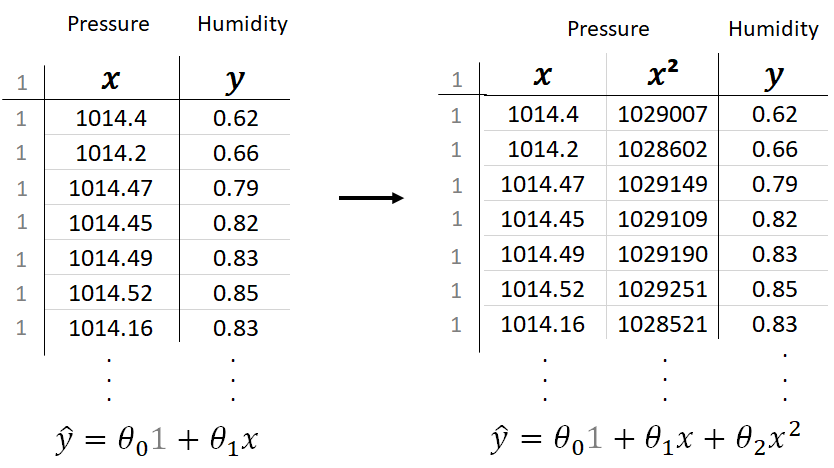

Notice that there is a hidden column of 1’s which can be thought of as the variable associated with θ₀. Since θ₀ × 1 = θ₀ this is often left out.

In [38]:
from sklearn.preprocessing import PolynomialFeatures

pre_process = PolynomialFeatures(degree = 2)

x_poly = pre_process.fit_transform(x)

x_poly

array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
       [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
       [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
       [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
       [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
       [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
       [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
       [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
       [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
       [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
       [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
       [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
       [1.00000000e+00, 1.00876

In [39]:
df_x_poly = pd.DataFrame(x_poly)
df_x_poly.columns = ['1','x','x_squared']
df_x_poly

,1,x,x_squared
0,1.0,1014.40,1.029007e+06
1,1.0,1014.20,1.028602e+06
2,1.0,1014.47,1.029149e+06
3,1.0,1014.45,1.029109e+06
4,1.0,1014.49,1.029190e+06
5,1.0,1014.52,1.029251e+06
6,1.0,1014.16,1.028521e+06
7,1.0,1014.24,1.028683e+06
8,1.0,1014.25,1.028703e+06
9,1.0,1013.96,1.028115e+06


#### **Implementing Polynomial Regression**

The method here remains the same as multiple linear regression in python, but here we are fitting our regression model on the polynomial features.

In [40]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train,y_test =train_test_split(x_poly,y, test_size=.20, random_state=1)


In [41]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(x_poly)

In [43]:
from sklearn import metrics

print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))

training score:  0.8212622197151398
test score:  0.9427391324681367


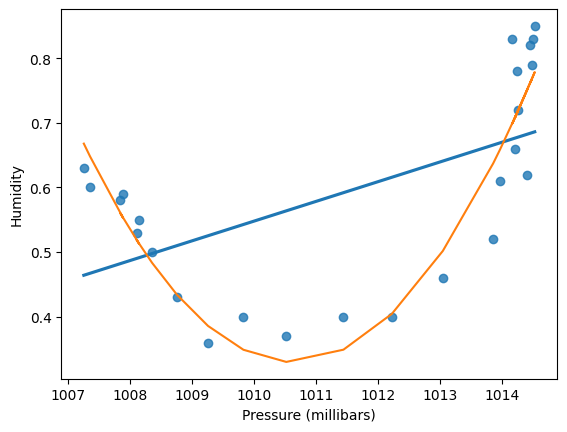

In [44]:
import seaborn as sns

sns.regplot(x = x,y = y, data = weather_data_p,fit_reg=True, ci = None)
plt.plot(x,y_pred)
plt.show()